<a href="https://colab.research.google.com/github/MilenaBaldeva/Codes_/blob/main/Exercise_Building_a_Machine_Learning_Model_for_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakkesharv/used-cars-detailed-dataset")

print("Path to dataset files:", path)

100%|██████████| 26.0k/26.0k [00:00<00:00, 8.92MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rakkesharv/used-cars-detailed-dataset/versions/1


In [3]:
import os

directory_path = "/root/.cache/kagglehub/datasets/rakkesharv/used-cars-detailed-dataset/versions/1"
print(os.listdir(directory_path))


['FINAL_SPINNY_900.csv']


In [4]:
file_path = "/root/.cache/kagglehub/datasets/rakkesharv/used-cars-detailed-dataset/versions/1/FINAL_SPINNY_900.csv"
df = pd.read_csv(file_path)

# Preview the data
print(df.head())

                                            Car_Name        Make       Model  \
0   Volkswagen Ameo [2016-2017] Highline 1.5L AT (D)  Volkswagen        Ameo   
1              Hyundai i20 Active [2015-2020] 1.2 SX     Hyundai  i20 Active   
2                               Honda WR-V VX i-VTEC       Honda        WR-V   
3                           Renault Kwid 1.0 RXT AMT     Renault        Kwid   
4  Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT     Hyundai   Grand i10   

   Make_Year   Color  Body_Type Mileage_Run No_of_Owners  Seating_Capacity  \
0       2017  silver      sedan      44,611          1st                 5   
1       2016     red  crossover      20,305          1st                 5   
2       2019   white        suv      29,540          2nd                 5   
3       2017  bronze  hatchback      35,680          1st                 5   
4       2017  orange  hatchback      25,126          1st                 5   

  Fuel_Type  Fuel_Tank_Capacity(L)                

In [5]:
df.isnull().sum()

,0
Car_Name,0
Make,0
Model,0
Make_Year,0
Color,0
Body_Type,0
Mileage_Run,0
No_of_Owners,0
Seating_Capacity,0
Fuel_Type,0


In [6]:
df.duplicated().sum()

62

In [7]:
duplicates = df[df.duplicated()]
print(duplicates)

                                            Car_Name           Make  \
203       Hyundai Creta [2015-2018] 1.6 SX Plus Auto        Hyundai   
205       Hyundai Creta [2015-2018] 1.6 SX Plus Auto        Hyundai   
237  Maruti Suzuki Baleno [2019-2022] Zeta AT Petrol  Maruti Suzuki   
239  Maruti Suzuki Baleno [2019-2022] Zeta AT Petrol  Maruti Suzuki   
250       Hyundai Creta [2015-2018] 1.6 SX Plus Auto        Hyundai   
..                                               ...            ...   
877                  Toyota Etios Liva [2010-2017] V         Toyota   
884            Hyundai Xcent [2017-2019] S AT Petrol        Hyundai   
886            Hyundai Xcent [2017-2019] S AT Petrol        Hyundai   
931            Hyundai Xcent [2017-2019] S AT Petrol        Hyundai   
933            Hyundai Xcent [2017-2019] S AT Petrol        Hyundai   

          Model  Make_Year   Color  Body_Type Mileage_Run No_of_Owners  \
203       Creta       2016    grey        suv      88,735          2nd   

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.dtypes

,0
Car_Name,object
Make,object
Model,object
Make_Year,int64
Color,object
Body_Type,object
Mileage_Run,object
No_of_Owners,object
Seating_Capacity,int64
Fuel_Type,object


In [10]:
print(df['No_of_Owners'].unique())

['1st' '2nd' '3rd']


In [11]:
df['No_of_Owners'] = df['No_of_Owners'].replace({'1st': 1, '2nd': 2, '3rd':3}).astype('int64')
print(df['No_of_Owners'].unique())

[1 2 3]


In [12]:
print(df['Price'].head())

0    6,57,000
1    6,82,000
2    7,93,000
3    4,14,000
4    5,15,000
Name: Price, dtype: object


In [13]:
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')
print(df['Price'].head())

0    657000
1    682000
2    793000
3    414000
4    515000
Name: Price, dtype: int64


In [14]:
df.nunique()

,0
Car_Name,376
Make,16
Model,87
Make_Year,12
Color,15
Body_Type,5
Mileage_Run,878
No_of_Owners,3
Seating_Capacity,5
Fuel_Type,3


In [17]:
df['Emission'] = df['Emission'].astype('category')
df['Engine_Type'] = df['Engine_Type'].astype('category')
df['Transmission_Type'] = df['Transmission_Type'].astype('category')
df['Body_Type'] = df['Body_Type'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')


In [16]:
print(df['Torque(Nm)'].head())

0    250.00
1    115.00
2    110.00
3     91.00
4    113.75
Name: Torque(Nm), dtype: float64


In [18]:
df.dtypes

,0
Car_Name,object
Make,object
Model,object
Make_Year,int64
Color,object
Body_Type,category
Mileage_Run,object
No_of_Owners,int64
Seating_Capacity,int64
Fuel_Type,category


In [19]:
df.describe()

,Make_Year,No_of_Owners,Seating_Capacity,Fuel_Tank_Capacity(L),CC_Displacement,Power(BHP),Torque(Nm),Price
count,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,9.140000e+02
mean,2016.890591,1.161926,5.101751,41.966083,1283.374179,90.030175,140.758643,7.213446e+05
std,2.816214,0.380285,0.460412,7.896784,272.768553,24.595367,62.748600,3.488668e+05
min,2011.000000,1.000000,4.000000,15.000000,624.000000,34.000000,48.000000,1.880000e+05
25%,2015.000000,1.000000,5.000000,35.000000,1197.000000,74.000000,109.000000,4.667500e+05
50%,2017.000000,1.000000,5.000000,42.000000,1197.000000,82.000000,114.000000,6.520000e+05
75%,2019.000000,1.000000,5.000000,45.000000,1496.000000,103.250000,154.000000,8.615000e+05
max,2022.000000,3.000000,8.000000,70.000000,2179.000000,177.000000,380.000000,2.941000e+06


In [21]:
df['Engine_Type'] = df['Engine_Type'].astype('object')

In [23]:
print(df['Transmission'].head())

0    7-Speed
1    5-Speed
2    5-Speed
3    5-Speed
4    5-Speed
Name: Transmission, dtype: object


In [24]:
df['Transmission'] = df['Transmission'].astype('category')
df['No_of_Owners'] = df['No_of_Owners'].astype('category')
df['Seating_Capacity'] = df['Seating_Capacity'].astype('category')

In [25]:
df.dtypes

,0
Car_Name,object
Make,object
Model,object
Make_Year,int64
Color,object
Body_Type,category
Mileage_Run,object
No_of_Owners,category
Seating_Capacity,category
Fuel_Type,category


In [29]:
categorical_columns = ['Body_Type','No_of_Owners','Seating_Capacity','Fuel_Type', 'Transmission', 'Transmission_Type','Emission']

for col in categorical_columns:

    print(f"Category in {col} is : {df[col].unique()}")

Category in Body_Type is : ['sedan', 'crossover', 'suv', 'hatchback', 'muv']
Categories (5, object): ['crossover', 'hatchback', 'muv', 'sedan', 'suv']
Category in No_of_Owners is : [1, 2, 3]
Categories (3, int64): [1, 2, 3]
Category in Seating_Capacity is : [5, 7, 8, 6, 4]
Categories (5, int64): [4, 5, 6, 7, 8]
Category in Fuel_Type is : ['diesel', 'petrol', 'petrol+cng']
Categories (3, object): ['diesel', 'petrol', 'petrol+cng']
Category in Transmission is : ['7-Speed', '5-Speed', '6-Speed', 'CVT', '4-Speed']
Categories (5, object): ['4-Speed', '5-Speed', '6-Speed', '7-Speed', 'CVT']
Category in Transmission_Type is : ['Automatic', 'Manual']
Categories (2, object): ['Automatic', 'Manual']
Category in Emission is : ['BS IV', 'BS V', 'BS III']
Categories (3, object): ['BS III', 'BS IV', 'BS V']


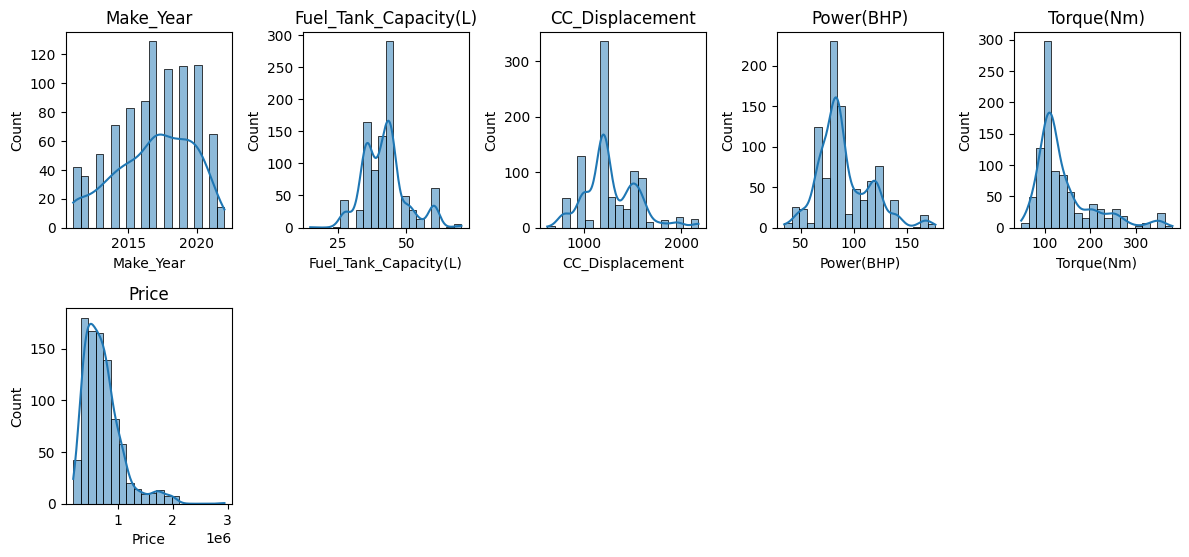

In [31]:
#EDA
# Distribution of Numerical Features
numerical_features = ['Make_Year', 'Fuel_Tank_Capacity(L)', 'CC_Displacement', 'Power(BHP)', 'Torque(Nm)',
                      'Price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

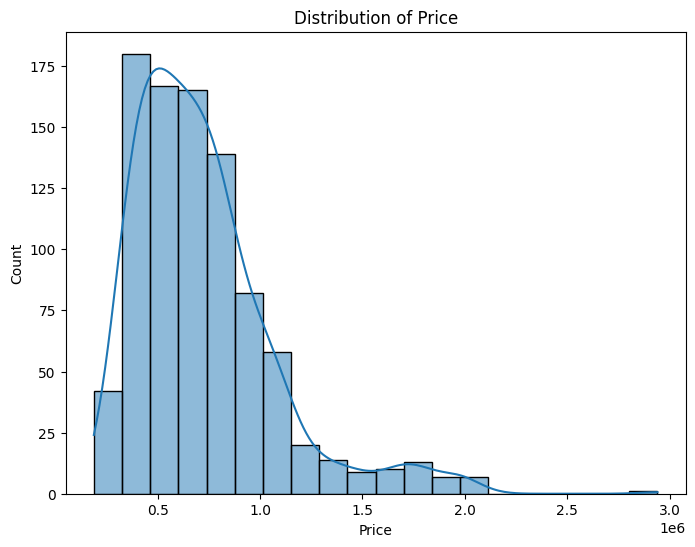

In [32]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

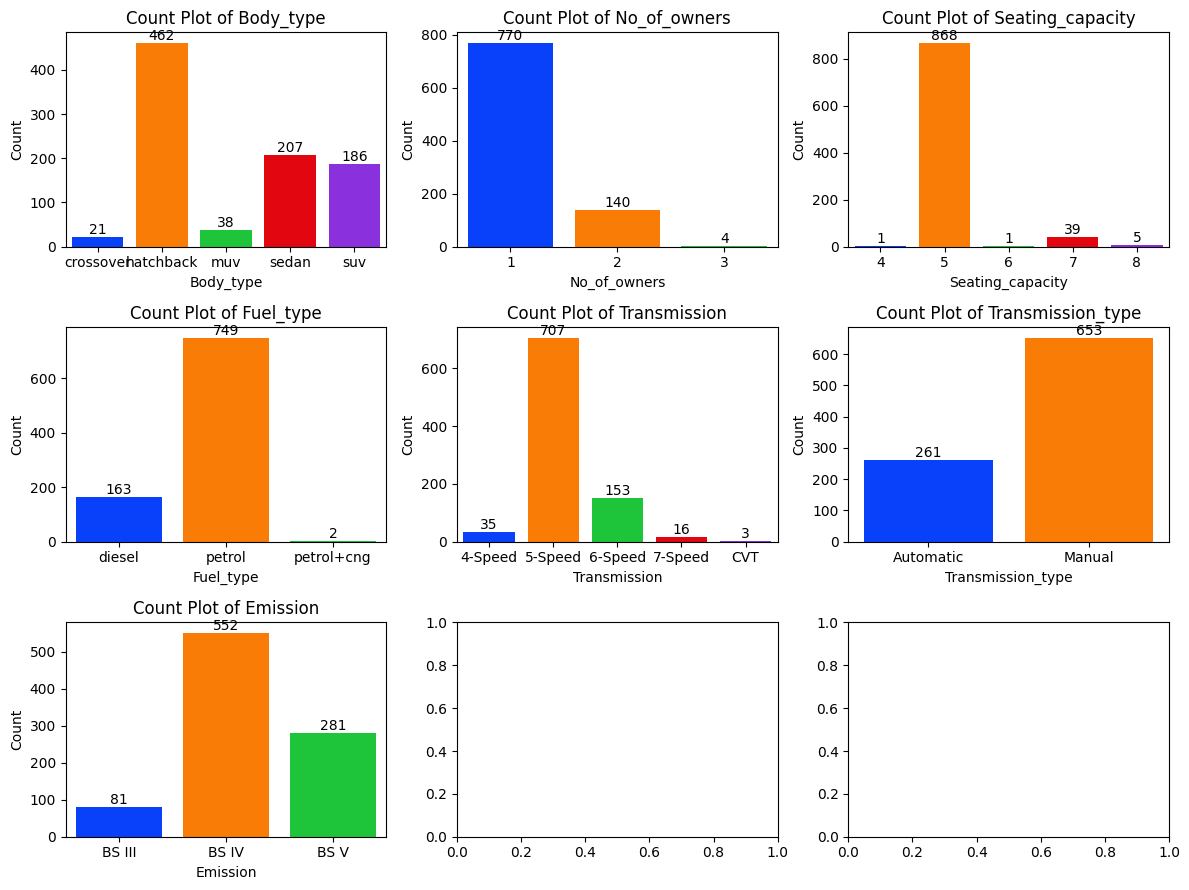

In [35]:
# Define the list of categorical columns to analyze
categorical_columns = ['Body_Type','No_of_Owners','Seating_Capacity','Fuel_Type', 'Transmission', 'Transmission_Type','Emission']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


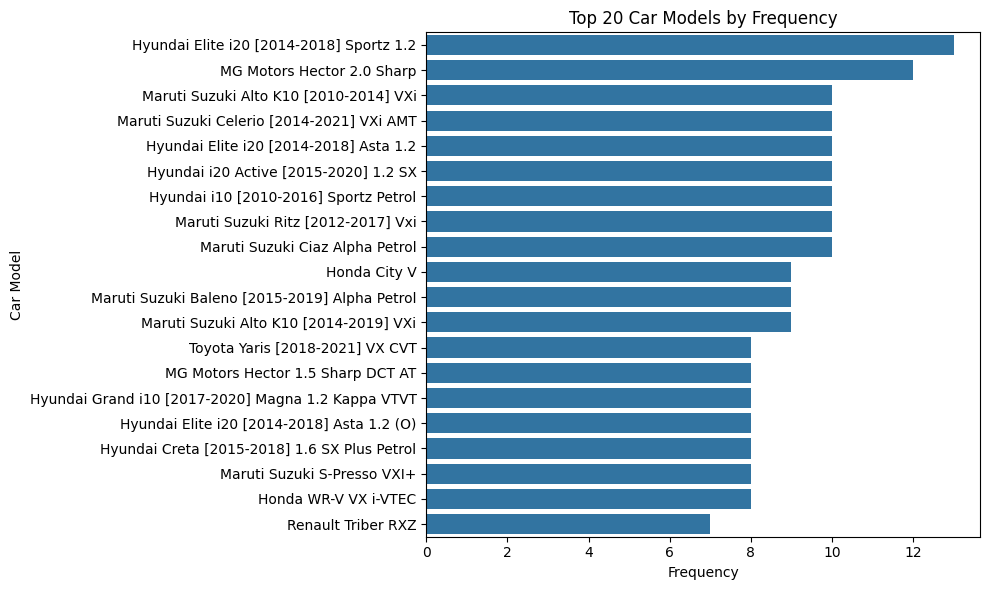

In [36]:
n = 20  # Number of top car models to plot
top_car_models = df['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

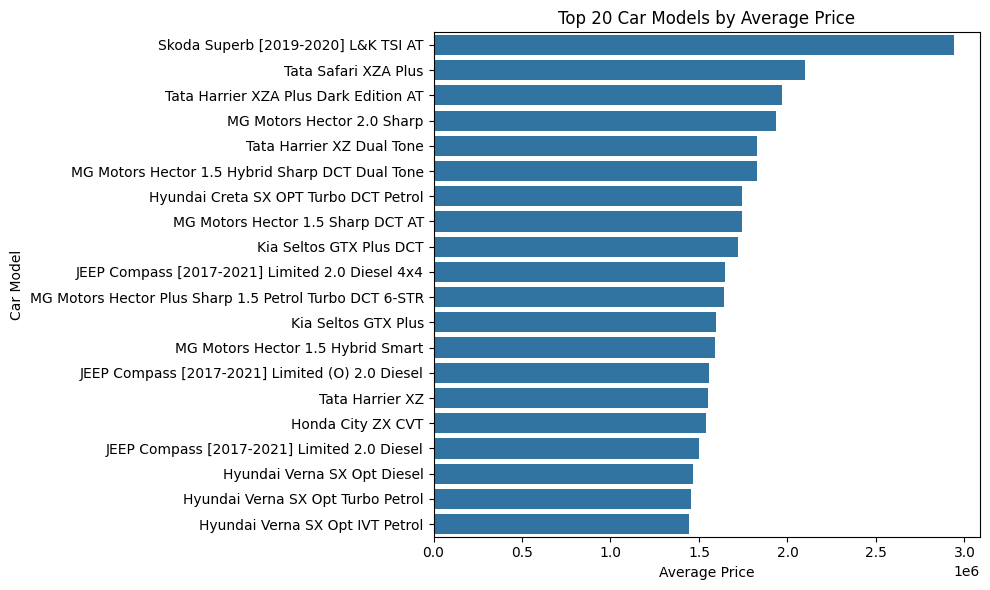

In [37]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('Car_Name')['Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

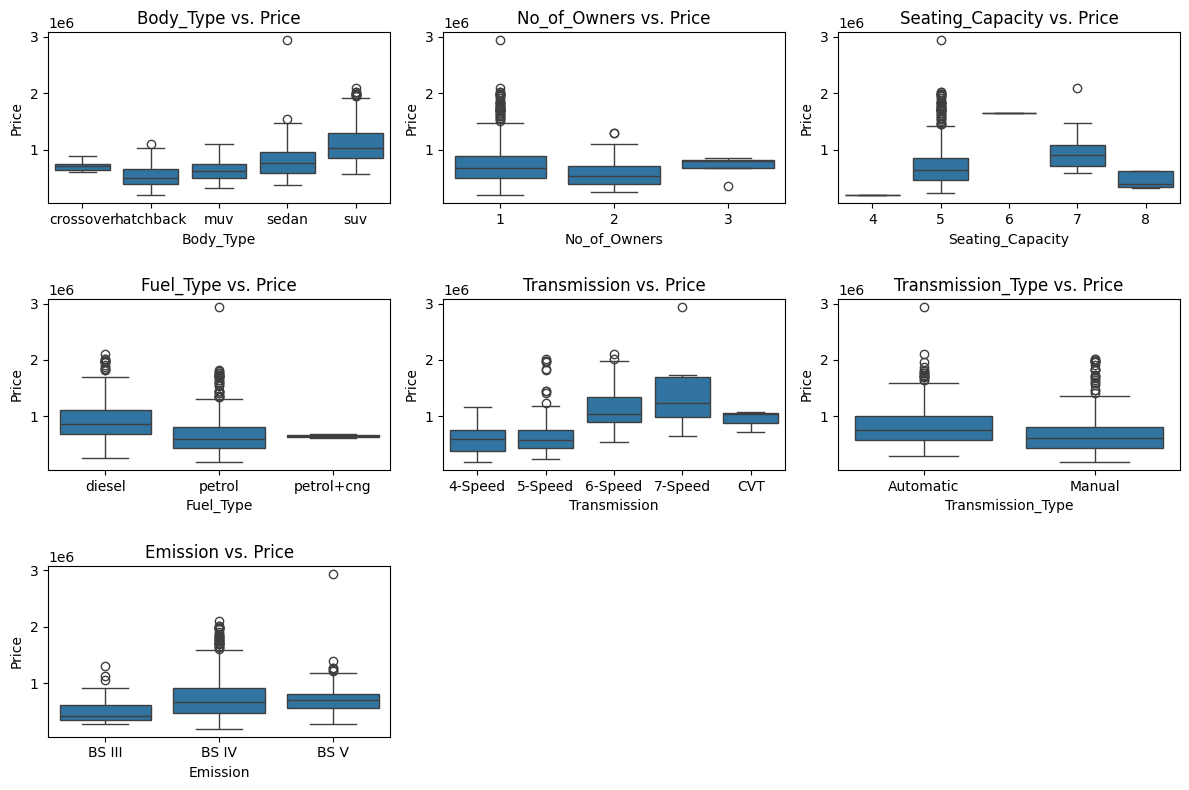

In [38]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

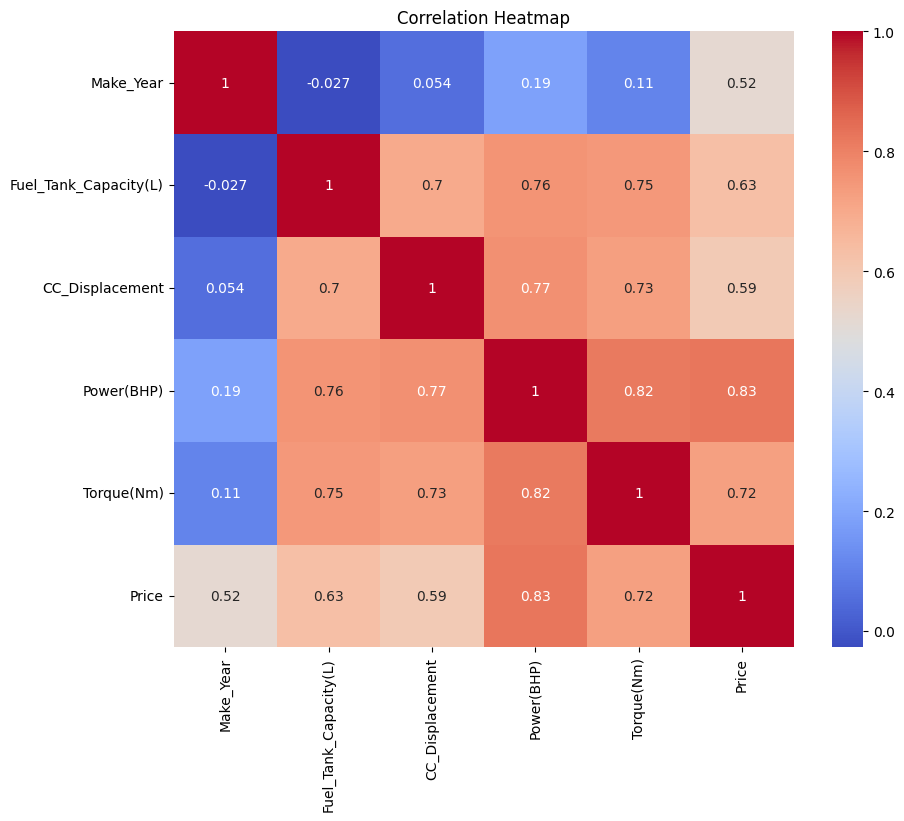

In [40]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [51]:
df['Make'] = label_encoder.fit_transform(df['Make'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Color'] = label_encoder.fit_transform(df['Color'])
df['Mileage_Run'] = label_encoder.fit_transform(df['Mileage_Run'])
df['Engine_Type'] = label_encoder.fit_transform(df['Engine_Type'])
df['Mileage(kmpl)'] = label_encoder.fit_transform(df['Mileage(kmpl)'])

In [50]:
df.dtypes

,0
Car_Name,object
Make,int64
Model,object
Make_Year,float64
Color,object
Body_Type,int64
Mileage_Run,object
No_of_Owners,int64
Seating_Capacity,int64
Fuel_Type,int64


In [46]:
# Feature scaling
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [52]:
# Splitting the dataset
X = df.drop(['Price', 'Car_Name'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [58]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

 R-squared: 0.8665727758404234
Mean Squared Error: 0.13832299126404873
Mean Absolute Error: 0.2884631269488532


In [54]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
400,-1.110902,-1.312514,0.201612
914,0.543930,-0.302680,0.846610
373,0.294415,0.438884,-0.144469
375,1.080245,1.025989,0.054256
380,-0.904406,-1.100128,0.195722
...,...,...,...
212,0.308755,0.039350,0.269405
859,1.172021,1.770146,-0.598125
614,-0.568851,-0.308808,-0.260043
936,0.090787,0.147196,-0.056409


# Summary of the results
R-squared (0.867):

This indicates that 86.7% of the variance in the target variable (Price) is explained by the model.
This is a strong value, suggesting that the model captures the relationships in the data well. However, it still leaves 13.3% of the variance unexplained, indicating room for improvement.

Mean Squared Error (MSE: 0.138):

MSE measures the average squared difference between predicted and actual values. A lower value is better, and your result suggests the model is reasonably accurate. However, being in squared terms, it can exaggerate the impact of outliers.

Mean Absolute Error (MAE: 0.288):

MAE is the average absolute difference between predictions and actual values. It is intuitive, as it is in the same unit as the target variable.

A value of 0.288 suggests the model predicts values with an average error of ~29% of the scale (assuming the values were scaled).


#Strengths

High R-squared: The model explains most of the variability in the data.
Low MAE and MSE: These values suggest the model has acceptable accuracy for many predictions.

#Weaknesses
Room for Optimization: While the metrics are good, further tuning could reduce errors.
Potential Outliers: Outliers may inflate the MSE disproportionately, affecting the perceived performance.


#Recommendations for Improvement

###Analyzing Residuals:

Plotting the residuals against the predicted values to identify any systematic patterns or trends.
Addressing patterns by considering data transformations or creating new features.

###Refining Feature Selection:

Reviewing the features to ensure each one contributes meaningfully to the prediction.
Removing any highly correlated or irrelevant features to simplify the model and improve generalizability.

###Exploring Advanced Models:

Using ensemble models such as Random Forest or Gradient Boosting (e.g., XGBoost) for potentially better performance on complex data.

###Performing Hyperparameter Optimization:

Conducting hyperparameter tuning using grid search or random search to optimize the model parameters for better accuracy.

###Handling Outliers:

Identifying outliers in the data and determining whether to transform or exclude them to improve model performance.

###Implementing Regularization:

Testing regularized regression models like Ridge or Lasso to prevent overfitting and enhance the model’s robustness.

###Applying Cross-Validation:

Conducting cross-validation to evaluate model performance more robustly and ensuring results are not dependent on a single train-test split.


These steps aim at reducing error, improving accuracy, and enhancing the overall reliability of the model.